In [26]:
## importing dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input = "In the town of Athy one Jeremy Lanigan\n Battered away til he hadnt a pound.\n His father died and made him a man again\n Left him a farm and ten acres of ground.\n He gave a grand party for friends and relations\n Who didnt forget him when come to the wall,\n And if youll but listen Ill make your eyes glisten\n Of the rows and the ructions of Lanigan’s Ball.\n Myself to be sure got free invitation,\n For all the nice girls and boys I might ask,\n And just in a minute both friends and relations\n Were dancing round merry as bees round a cask.\n Judy ODaly, that nice little milliner,\n She tipped me a wink for to give her a call,\n And I soon arrived with Peggy McGilligan\n Just in time for Lanigans Ball."

In [3]:
tokenizer = Tokenizer()
corpus = input.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(total_words)

97


In [5]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
print(input_sequences[:5])

[[6, 3], [6, 3, 17], [6, 3, 17, 4], [6, 3, 17, 4, 18], [6, 3, 17, 4, 18, 19]]


In [9]:
print(pad_sequences(input_sequences[:10]))

[[ 0  0  0  0  0  0  6  3]
 [ 0  0  0  0  0  6  3 17]
 [ 0  0  0  0  6  3 17  4]
 [ 0  0  0  6  3 17  4 18]
 [ 0  0  6  3 17  4 18 19]
 [ 0  6  3 17  4 18 19 20]
 [ 6  3 17  4 18 19 20 21]
 [ 0  0  0  0  0  0 22 23]
 [ 0  0  0  0  0 22 23 24]
 [ 0  0  0  0 22 23 24  9]]


In [12]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)

[[ 0  0  0 ...  0  6  3]
 [ 0  0  0 ...  6  3 17]
 [ 0  0  0 ...  3 17  4]
 ...
 [ 0  0  0 ...  6 95  5]
 [ 0  0  0 ... 95  5 96]
 [ 0  0  0 ...  5 96 12]]


In [13]:
## spliting to featue and labels
xs = input_sequences[:,:-1]
lables = input_sequences[:,-1]

In [14]:
ys = tf.keras.utils.to_categorical(lables, num_classes=total_words)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


## Creating the model

In [22]:
model = Sequential()
model.add(tf.keras.layers.Embedding(total_words,8))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
history = model.fit(xs, ys, epochs=1500, verbose=1)

Epoch 1/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.0086 - loss: 4.5756   
Epoch 2/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0088 - loss: 4.5735    
Epoch 3/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0322 - loss: 4.5706
Epoch 4/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0408 - loss: 4.5673
Epoch 5/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0410 - loss: 4.5650
Epoch 6/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0493 - loss: 4.5622
Epoch 7/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0376 - loss: 4.5607
Epoch 8/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0356 - loss: 4.5570
Epoch 9/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0681 - loss: 4.5517
Epoch 10/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0379 - loss: 4.5505    
Epoch 11/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0452 - loss: 4.5460
Epoch 12/1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 

In [36]:
## Creating function to display the graph
def plot_graph(fitted_history):
  epochs = range(1, len(history.history['accuracy']) + 1)
  plt.plot(epochs, history.history['accuracy'])
  plt.show()

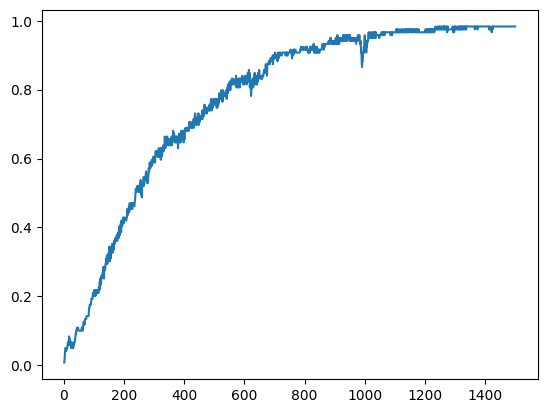

In [37]:
plot_graph(history)